In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'
%load_ext autoreload
%autoreload 2

import pandas as pd

In [2]:
from churn_library import (import_data, encoder_helper, perform_eda, 
                           perform_feature_engineering,RandomForestModel,
                           LinearRegressionModel, classification_report_image, 
                           feature_importance_plot)

from constants import (cat_columns, quant_columns)

In [3]:
file_path = "./data/bank_data.csv"
df = import_data(file_path)

In [4]:
df.shape

(10127, 21)

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
# Create label
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


#### EDA
- Run `perform_eda()` function
- output will be saved to the `./images/eda/` folder

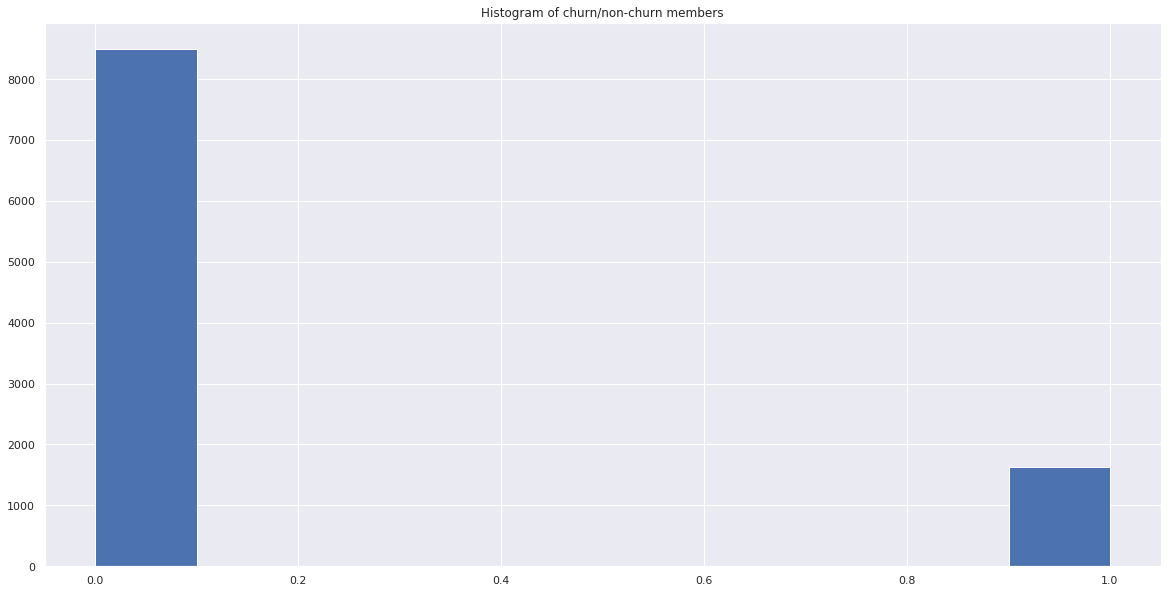

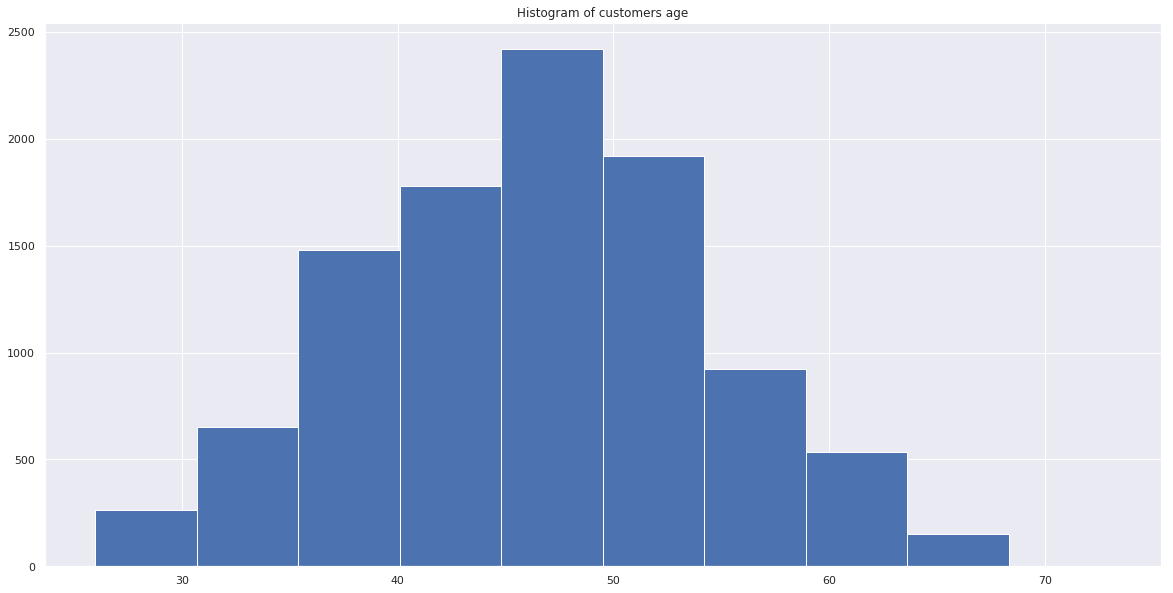

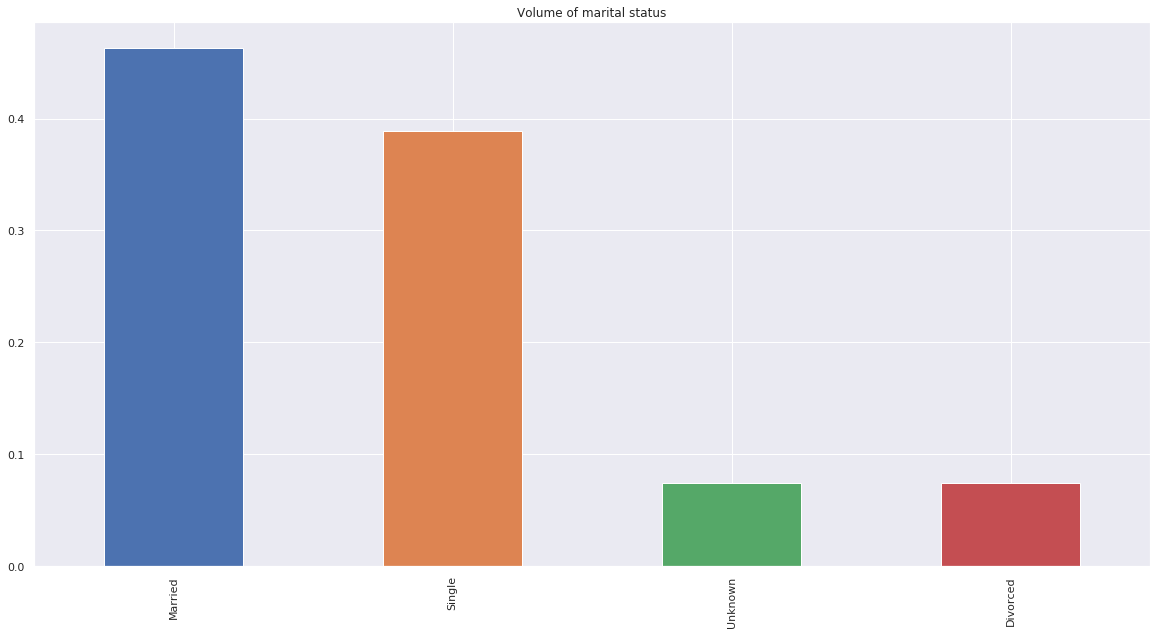

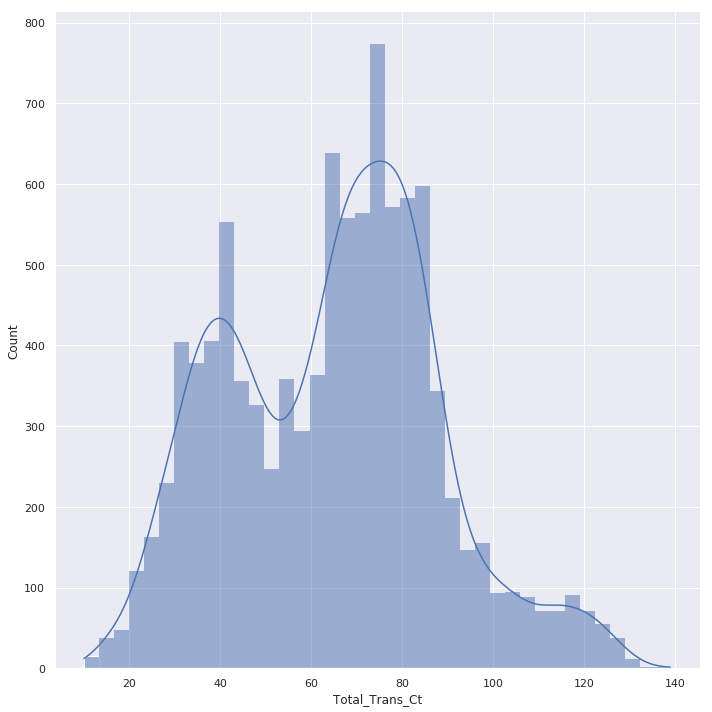

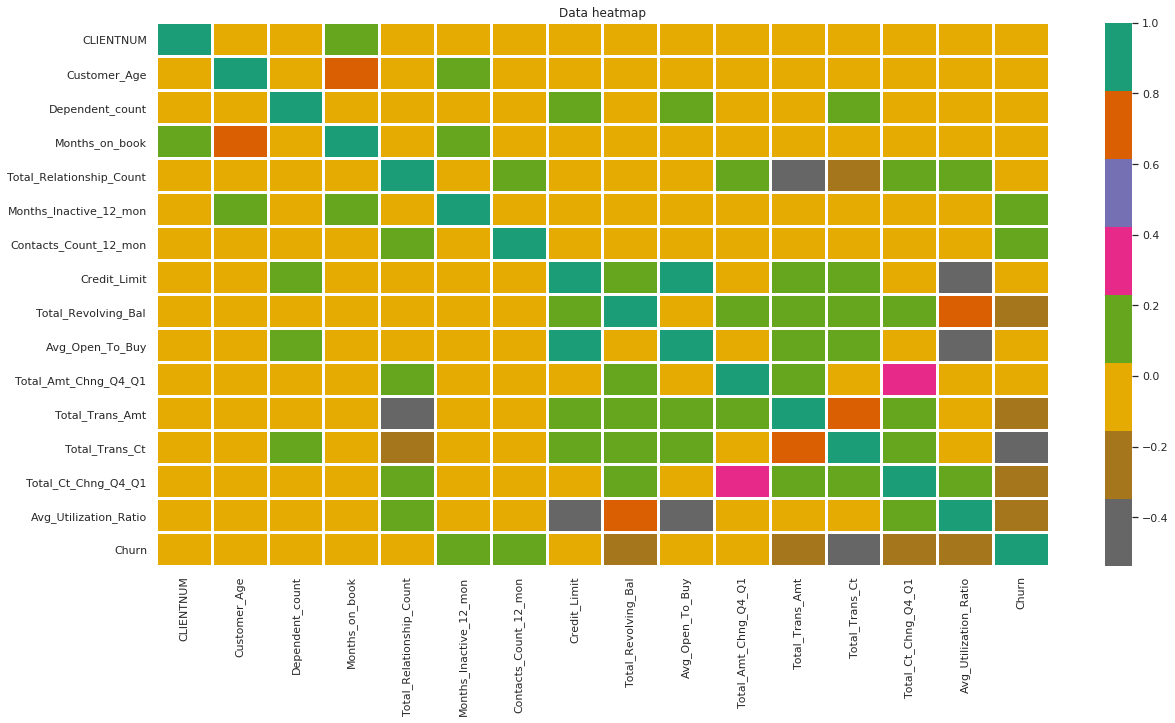

In [9]:
perform_eda(df)

### Feature Engineering
- Encode categorical variables with the mean value of `churn`
- Split data in training and testing sets

In [10]:
df = encoder_helper(df, cat_columns)

In [11]:
# train test split 
x_train, x_test, y_train, y_test = perform_feature_engineering(df)

### Model Training
- Train a RandomForest and LinearRegression model 
- Print train/test results
- Save the model

In [12]:
# Define model instances 
rf = RandomForestModel(x_train, 
                       x_test, 
                       y_train, 
                       y_test,
                       model_name="rf_0.0.1")

lr = LinearRegressionModel(x_train, 
                           x_test, 
                           y_train, 
                           y_test,
                           model_name="lr_0.0.1", 
                           model_path='./models/')

In [13]:
# Iterate over model types and call class function
for model in [rf, lr]:
    print(model.get_name())
    model.train_model()
    model.get_train_test_results()
    model.save_model()

rf_0.0.1
Training model: rf_0.0.1
rf_0.0.1 results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

Saving model to ./models/
lr_0.0.1
lr_0.0.1 results
test results
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2543
           1       0.72      0.44      0.54       496

    accuracy                           

### Classification report
- Pass a list of model objects
- This will generate ROC Curve diagrams for all models and save an image of the classificiation report in the `./images/results/` folder

In [14]:
classification_report_image(models=[lr, rf])

Generating ROC curve for 2 models
Loading model from ./models/
Loading model from ./models/
Generating classification report for lr_0.0.1
Generating classification report for rf_0.0.1

Images save to ./images/results/


### Explainability
- generate a shap summary and feature importance diagram
- Output will be saved to `./images/feature_importances`

In [16]:
feature_importance_plot(rf)

Loading model from ./models/
Images saved to ./images/feature_importances


In [20]:
feature_importance_plot(lr)

Loading model from ./models/
Cant perform feature importance analysis using Shap with lr_0.0.1
